<h1 align="center">Surface Hydrology</h1>
<h2 align="center">GEO2010 Spring 2017</h2>
<h3 align = "center" > Exercise 7</h3>

#### Date: 2017/03/20

##### Training  Exercise 6.1

In Appendix A, hydrographs for monthly average discharge from eight different catchments in Norway are found.

a) Describe the different hydrological regimes B-H in Appendix A, by looking at the seasonal variation. Where in Norway do you think the catchments are located?

b)  One of the catchments constitute about 21% of glacier area. Based on the monthly average discharge, find out for which catchment this is the case.

c) Comment on the first hydrograph, A. Which factors contribute to runoff here? Determine the hydrologic regime.

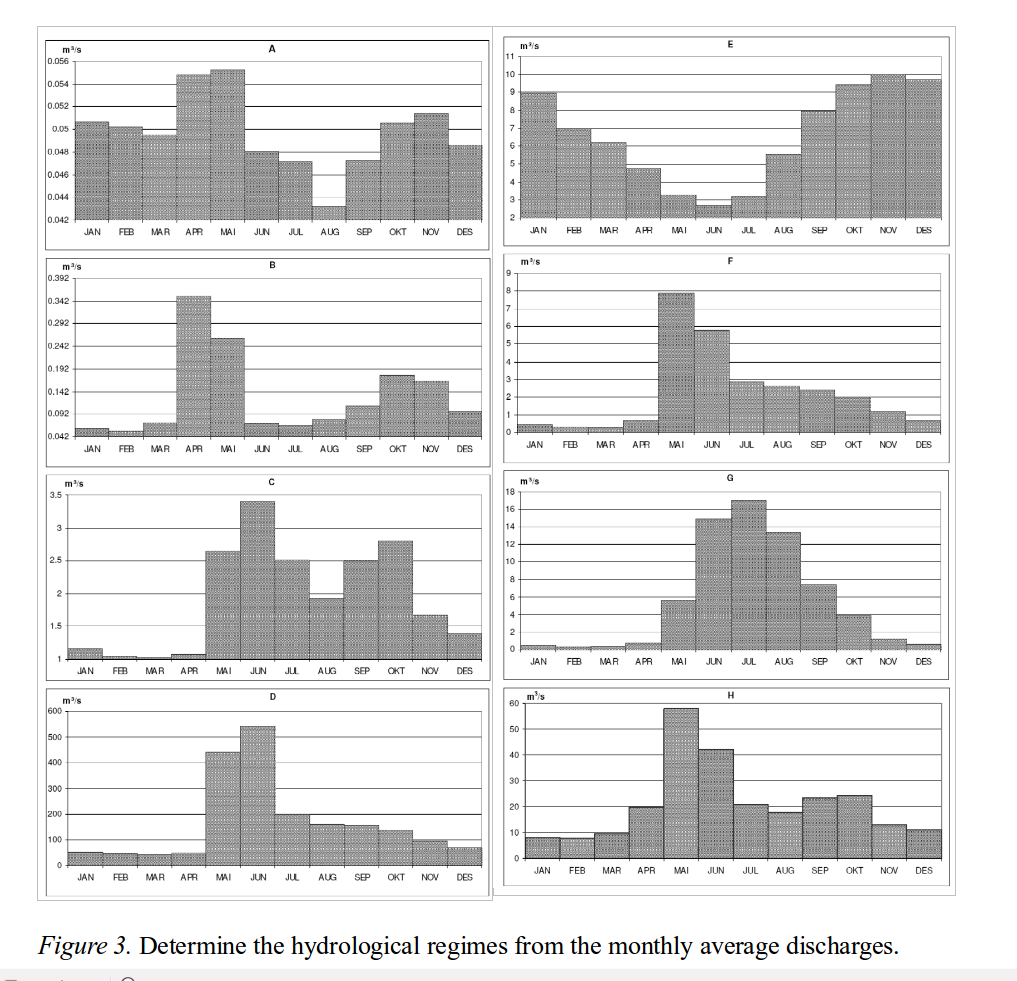

In [1]:
from IPython.display import Image
Image(filename='Appendix_A.png')

##### Training Exercise 6.2

Sogna and Risa are catchments located at Gardermoen - on either side of the airport. The catchment area of Sogna is steep and the Risa catchment is relatively flat. Risa lies on top of coarse grained, groundwater-bearing sediments deposited during the deglaciation (norsk: et isranddelta). Sogna is situated in an area of ancient seabed (clay), consisting of fine-grained sediments with low permeability which has formed characteristic ravines.

Figure 2 shows the discharge from Sogna and Risa in 1996. Describe and explain the differences in hydrological characteristics between the two catchments. Can this be explained by the map in Appendix B?


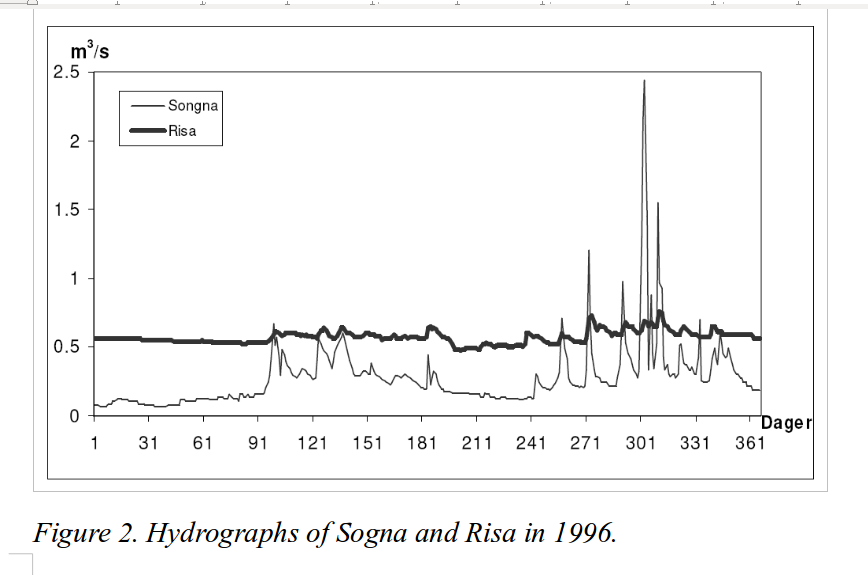

In [2]:
Image(filename='hydrograph_songna_risa.png')

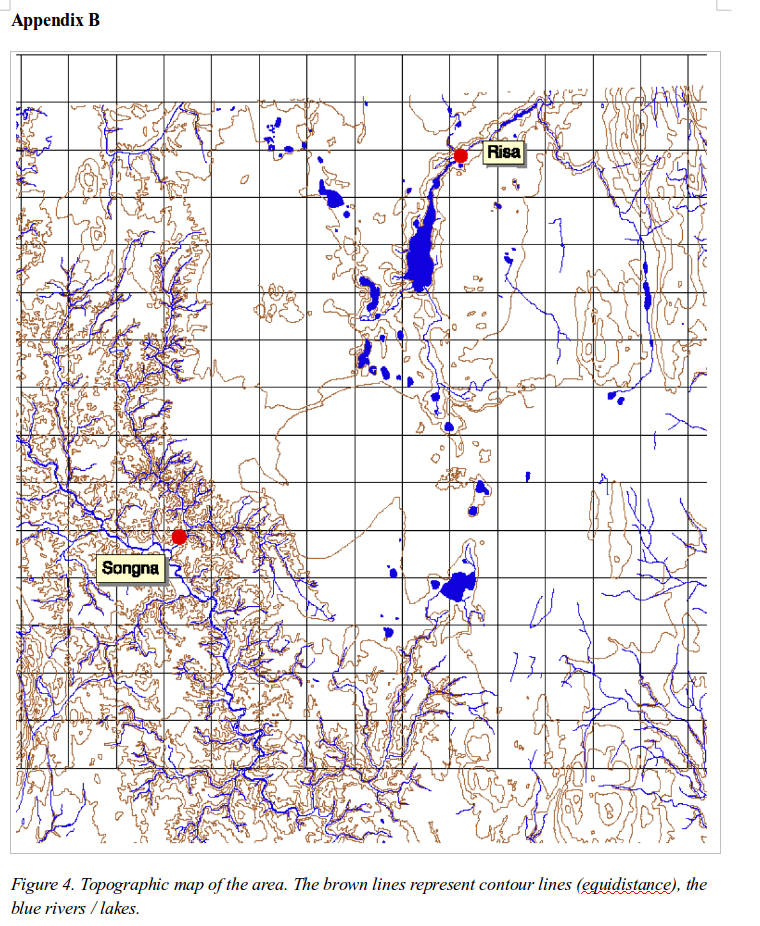

In [3]:
Image(filename='Appendix_B.png')

# Se løsningsforslag av Irene Brox Nilsen

##### Training Exercise 6.3
Give some characteristics of hydrology in Norway, Finland, Denmark, Iceland and Sweden.

**Obligatory Exercise 6.**

In the file DoubleMass.xls,  yearly rainfall depth (mm) for three rainfall stations are given. We assume that the observation series of stations B and C are homogeneous. Perform homogeneity test for station A by double mass curve analysis. Is there break in the homogeneity in series A? When did you observe homogeneity break? Mention possible causes of homogeneity breaks in rainfall series. The method is described in Dingman, section 4.2 on page 157 (+ Figure on page 159).

b) Perform the homogenity test. Hint1: In order to compute a cumulative sum of an array, you can use np.cumsum(array_name)

c) Plot the two cumulative series against one another and look for discontinuities in the gradient.

d) Compute the first order polynomial fit of the two vectors.
In order to compute a polynomial fit, numpy as the function polyfit(arr1,arr2,degree_polynomial)
To compute fit lines (value of the polynomial, p, at X), use np.polyval(p,X).

e) Plot the best fit lines.

f) Compute the correction factor (Following Dingman 4.2.4) and correct the values in station1 prior to the discontinuity observed in c). Finally plot the corrected series against the old series.

In [4]:
# This solution is largely based on the work of some teacher before me. 
# My contribution has mainly been to add some comments and make the variable
# names more descriptive. I have also introduced the time stamps in the plots below.
# Håvard Kristiansen, 22 February 2017

from openpyxl import *
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm


#Set the inline size of plots
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

# Read the workbook:
wb = load_workbook(filename ='DoubleMass.xlsx')
# Read the worksheet:
ws = wb.active

# Read the years and the respective precipitation rates:
Year = [int(cell.value) for row in ws.iter_rows('B4:B41') for cell in row]
RateA = [float(cell.value) for row in ws.iter_rows('C4:C41') for cell in row]
RateB = [float(cell.value) for row in ws.iter_rows('D4:D41') for cell in row]
RateC = [float(cell.value) for row in ws.iter_rows('E4:E41') for cell in row]

# Convert the rate data into arrays:
RateA = np.array(RateA)
RateB = np.array(RateB)
RateC = np.array(RateC)

# Calculate the cumulative sum of the precipitiation rate at each station:
cumSumRateA = np.cumsum(RateA)
cumSumRateB = np.cumsum(RateB)
cumSumRateC = np.cumsum(RateC)

# calculate the mean of the cumulative sums at stations B and C:
BCmean = np.mean(np.vstack((cumSumRateB, cumSumRateC)),axis=0)

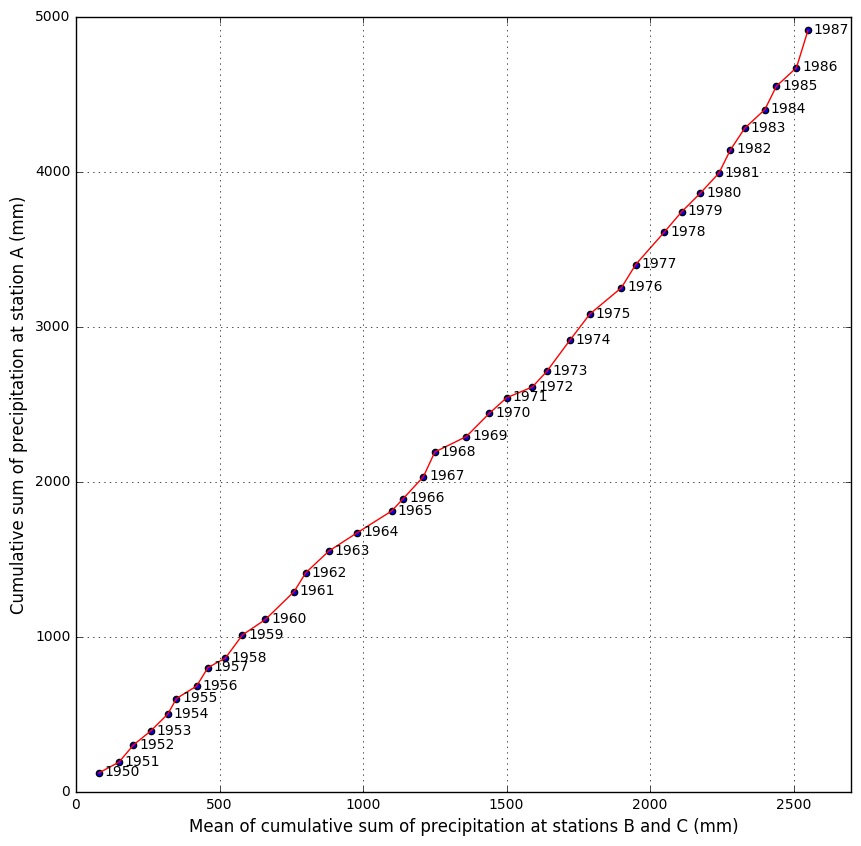

In [5]:
# Make a plot of the cumulative sum of precipitation at station A as a
# function of the mean of the cumulative sums at stations B and C:

plt.figure(1)    #Declare a figure
fig, ax = plt.subplots()
ax.plot(BCmean,cumSumRateA,'-r')    #Make the plot with a red line
#Add the individual data points, with size s and color index by year: 
ax.scatter(BCmean,cumSumRateA)
ax.axis([0,2700,0,5000])    # Crop the axes:
plt.grid(True)    # Show grid

#Tag each observation with the year
for i, txt in enumerate(Year):
    ax.annotate(txt, (BCmean[i]+20,cumSumRateA[i]-20))

# Set the axis labels:
plt.xlabel('Mean of cumulative sum of precipitation at stations B and C (mm)',fontsize=12)
plt.ylabel('Cumulative sum of precipitation at station A (mm)',fontsize=12)
# Save the figure as a file in the current directory:
plt.savefig('original2.pdf',bbox_inches='tight')
plt.show()    #Display the plot     

### Comments to the graph: 
We see a kink in the slope at the year 1971.

In [6]:
#We observe a kink in the gradient at t=1971.
#We seek the index where Y=1971

here = 0
while Year[here] != 1971:
    here+=1

#Simple first order polynomial fits. Use polyfit.
qall = np.polyfit(BCmean,cumSumRateA,1)    #A first-order polynomial fit to the entire time series
q0 = np.polyfit(BCmean[0:here+1],cumSumRateA[0:here+1],1)    #A ploynomial fit to the time series up to 1971
qend = np.polyfit(BCmean[here:],cumSumRateA[here:],1)    #A ploynomial fit to the time series after 1971

#Use these to compute fit lines (value of the polynomial at X). This gives the y-values of the fitted polynomials
#Use polyval.
pall = np.polyval(qall,BCmean)
p0 = np.polyval(q0,BCmean[0:here+1])
pend = np.polyval(qend,BCmean[here:])

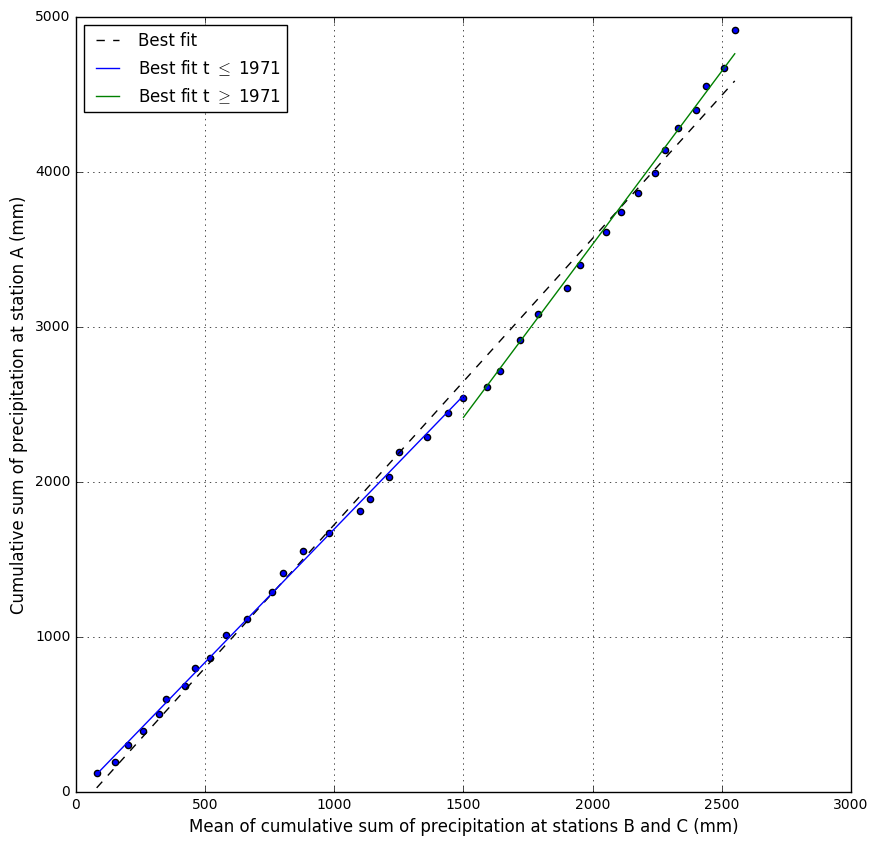

In [7]:
plt.figure(2)
#Make a scatter plot of the cumulative precipitation at station A as a function of the mean precipitation at
#stations B and C:
plt.scatter(BCmean,cumSumRateA)

#plotting the best fit line for BC mean with best fit value
plt.plot(BCmean,pall,'--k',label='Best fit')

#making the best fit line for data below break point
plt.plot(BCmean[0:here+1],p0,'-',label='Best fit t $\leq$ 1971')


#making the plot for best fitline for data above break point
plt.plot(BCmean[here:],pend,'-',label='Best fit t $\geq$ 1971')

# plotting legend
plt.legend(loc='upper left')
#plotting xlabel
plt.xlabel('Mean of cumulative sum of precipitation at stations B and C (mm)',fontsize=12)
#plotting ylabel
plt.ylabel('Cumulative sum of precipitation at station A (mm)',fontsize=12)
plt.grid(True)    # Show grid
#defining axis
plt.axis([0,3000,0,5000])

#saving figure
#plt.savefig('fits.pdf',bbox_inches='tight')
# display plot
plt.show()

In [8]:
#Calculating correction factor (Dingman,page 157 )
K = qend[0]/q0[0]
#Generate an array of zeros the same length as the time series at station A:
Ks = np.zeros(len(RateA))
#Assign the value of the correction factor up to break point
Ks[0:here]=K
#Set the correction factor after the break point to 1:
Ks[here:] = 1.0
#Perform the correction by multiplying the rate at station A with the correction factor:
RateAcorr = np.multiply(Ks,RateA)
# Again determining the cumsum for corrected precipitation
cumSumRateAcorr = np.cumsum(RateAcorr)

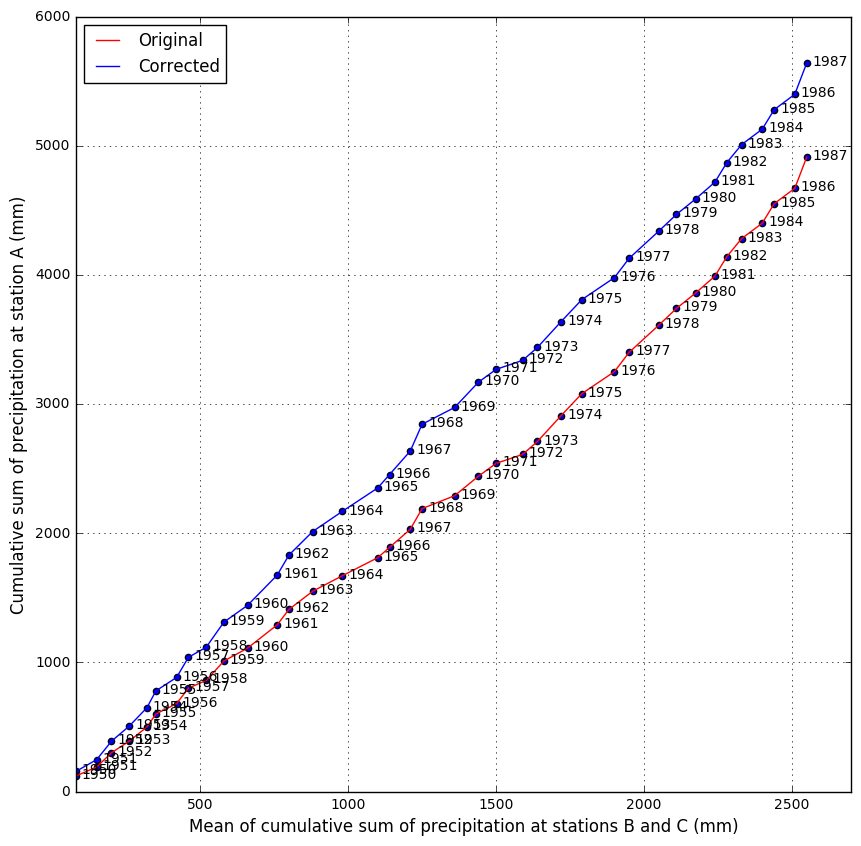

In [9]:
#Plot the corrected time series:
plt.figure(3)
ax = plt.subplot()
plt.plot(BCmean,cumSumRateA,'-r',label='Original')
plt.plot(BCmean,cumSumRateAcorr,'-b',label='Corrected')
plt.legend(loc='upper left')
plt.scatter(BCmean,cumSumRateA)
plt.scatter(BCmean,cumSumRateAcorr)
plt.axis([80,2700,0,6000])
plt.grid(True)

#Tag each observation with the year
for i, txt in enumerate(Year):
    ax.annotate(txt, (BCmean[i]+20,cumSumRateA[i]-20))
    ax.annotate(txt, (BCmean[i]+20,cumSumRateAcorr[i]-20))
    
plt.xlabel('Mean of cumulative sum of precipitation at stations B and C (mm)',fontsize=12)
plt.ylabel('Cumulative sum of precipitation at station A (mm)',fontsize=12)
plt.savefig('corrected.pdf',bbox_inches='tight')
plt.show()